<a href="https://colab.research.google.com/github/mahin-arvind/GTD-EDA/blob/main/Copy_of_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [1]:
import pandas as pd
import numpy as np


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The csv file doesn't have default character encoding UTF-8 making it unable to read. Hence, ISO-8859-1 encoding is used

In [3]:
filepath = '/content/drive/MyDrive/AlmaBetter/EDA CAPSTONE/Global Terrorism Data.csv'
gta_df = pd.read_csv(filepath, encoding = "ISO-8859-1", engine='python')

Viewing the head and tail samples of the given dataset

In [4]:
gta_df.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
gta_df.tail(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,...,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,...,NaN,NaN,Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,4.0,Unknown,-99.0,Seven military planes were damaged in this att...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,Unknown,-99.0,Houses were damaged in this attack.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,South Asia,Manipur,Imphal,24.798346,93.940430,1.0,0,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,2,Government (General),21.0,Government Building/Facility/Office,Forest Department Manipur,Office,...,NaN,NaN,A thrown grenade was used in the attack.,0.0,0.0,0.0,0.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Cotabato City,7.209594,124.241966,1.0,0,NaN,12/31/2017: An explosive device was discovered...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,20,Unknown,NaN,NaN,Unknown,Unknown,...,NaN,NaN,An explosive device containing a detonating co...,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN

The Global Terrorism Dataset has 135 attributes


In [6]:
gta_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

Relevant Columns are chosen with the help of the [GTA CodeBook](https://www.start.umd.edu/gtd/downloads/Codebook.pdf)

In [7]:
useful_columns = ['eventid','iyear','country_txt', 'region_txt','city','crit1','crit2','crit3','attacktype1','attacktype1_txt',
                  'success','suicide','weaptype1','weaptype1_txt','targtype1','targtype1_txt', 'gname','claimed','nkill',
                  ]


In [8]:
gta_df = gta_df.loc[:, useful_columns]

#Data Exploration

The new dataframe will be used to perform the analysis. The samples of the head and tail are displayed down below

In [9]:
gta_df.head(5)

,eventid,iyear,country_txt,region_txt,city,crit1,crit2,crit3,attacktype1,attacktype1_txt,success,suicide,weaptype1,weaptype1_txt,targtype1,targtype1_txt,gname,claimed,nkill
0,197000000001,1970,Dominican Republic,Central America & Caribbean,Santo Domingo,1,1,1,1,Assassination,1,0,13,Unknown,14,Private Citizens & Property,MANO-D,NaN,1.0
1,197000000002,1970,Mexico,North America,Mexico city,1,1,1,6,Hostage Taking (Kidnapping),1,0,13,Unknown,7,Government (Diplomatic),23rd of September Communist League,NaN,0.0
2,197001000001,1970,Philippines,Southeast Asia,Unknown,1,1,1,1,Assassination,1,0,13,Unknown,10,Journalists & Media,Unknown,NaN,1.0
3,197001000002,1970,Greece,Western Europe,Athens,1,1,1,3,Bombing/Explosion,1,0,6,Explosives,7,Government (Diplomatic),Unknown,NaN,NaN
4,197001000003,1970,Japan,East Asia,Fukouka,1,1,1,7,Facility/Infrastructure Attack,1,0,8,Incendiary,7,Government (Diplomatic),Unknown,NaN,NaN


In [10]:
gta_df.tail(5)

,eventid,iyear,country_txt,region_txt,city,crit1,crit2,crit3,attacktype1,attacktype1_txt,success,suicide,weaptype1,weaptype1_txt,targtype1,targtype1_txt,gname,claimed,nkill
181686,201712310022,2017,Somalia,Sub-Saharan Africa,Ceelka Geelow,1,1,0,2,Armed Assault,1,0,5,Firearms,4,Military,Al-Shabaab,1.0,1.0
181687,201712310029,2017,Syria,Middle East & North Africa,Jableh,1,1,0,3,Bombing/Explosion,1,0,6,Explosives,4,Military,Muslim extremists,0.0,2.0
181688,201712310030,2017,Philippines,Southeast Asia,Kubentog,1,1,1,7,Facility/Infrastructure Attack,1,0,8,Incendiary,14,Private Citizens & Property,Bangsamoro Islamic Freedom Movement (BIFM),0.0,0.0
181689,201712310031,2017,India,South Asia,Imphal,1,1,1,3,Bombing/Explosion,0,0,6,Explosives,2,Government (General),Unknown,0.0,0.0
181690,201712310032,2017,Philippines,Southeast Asia,Cotabato City,1,1,1,3,Bombing/Explosion,0,0,6,Explosives,20,Unknown,Unknown,0.0,0.0


In [11]:
gta_df.describe()

,eventid,iyear,crit1,crit2,crit3,attacktype1,success,suicide,weaptype1,targtype1,claimed,nkill
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,115571.000000,171378.000000
mean,2.002705e+11,2002.638997,0.988530,0.993093,0.875668,3.247547,0.889598,0.036507,6.447325,8.439719,0.049666,2.403272
std,1.325957e+09,13.259430,0.106483,0.082823,0.329961,1.915772,0.313391,0.187549,2.173435,6.653838,1.093195,11.545741
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,-9.000000,0.000000
25%,1.991021e+11,1991.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,5.000000,3.000000,0.000000,0.000000
50%,2.009022e+11,2009.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000,6.000000,4.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000,6.000000,14.000000,0.000000,2.000000
max,2.017123e+11,2017.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,13.000000,22.000000,1.000000,1570.000000


Observation: The maximum amount of fatalities an even has claimed is 1570

###CHECKING FOR NULL VALUES

In [12]:
gta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   eventid          181691 non-null  int64  
 1   iyear            181691 non-null  int64  
 2   country_txt      181691 non-null  object 
 3   region_txt       181691 non-null  object 
 4   city             181257 non-null  object 
 5   crit1            181691 non-null  int64  
 6   crit2            181691 non-null  int64  
 7   crit3            181691 non-null  int64  
 8   attacktype1      181691 non-null  int64  
 9   attacktype1_txt  181691 non-null  object 
 10  success          181691 non-null  int64  
 11  suicide          181691 non-null  int64  
 12  weaptype1        181691 non-null  int64  
 13  weaptype1_txt    181691 non-null  object 
 14  targtype1        181691 non-null  int64  
 15  targtype1_txt    181691 non-null  object 
 16  gname            181691 non-null  obje

Attributes 'claimed' and 'nkill' have null values.

###Handling null values

1) 'claimed'

Down below are the unique values in the column 'claimed'. Here, -9 indicates that the data was unavailable at the time. Null values will be replaced by -9 as dropping the rows will eliminate almost 8000 columns 

In [13]:
gta_df['claimed'].fillna(-9, inplace = True)

In [14]:
gta_df[gta_df['claimed'].isna()]['claimed'].count()

0

2) 'nkill'

Null values of nkill is replaced by the median value of nkill 

In [15]:
gta_df['nkill'].median()

0.0

In [16]:
gta_df['nkill'].fillna(0, inplace = True)

###Correlation

Importing required libraries for visualizing 

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [18]:
corrdf = gta_df.corr(method = 'spearman')

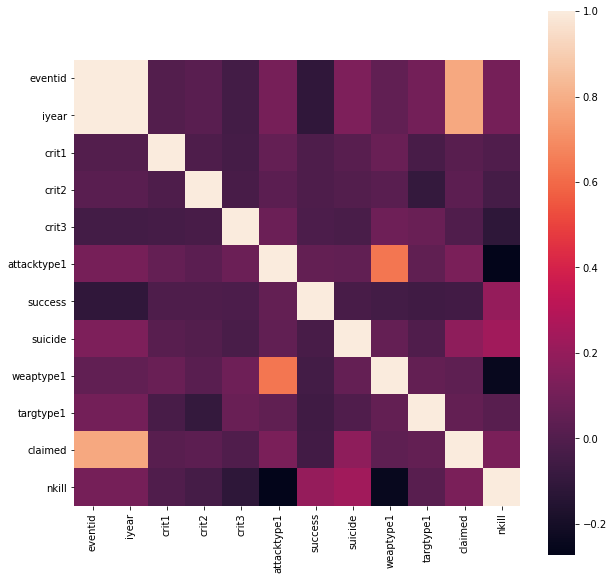

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(corrdf,square = True)

attacktype, weapontype have an inverse correlation with number of kills
attacktype, weapontype have an incerse correlation with number of kills

Notable correlation observed with
weapon and type of attack

Mild correlation observed with target type1 and crit3 ( criteria: OUTSIDE INTERNATIONAL HUMANITARIAN LAW)

##Global

(1970.0, 2017.0)

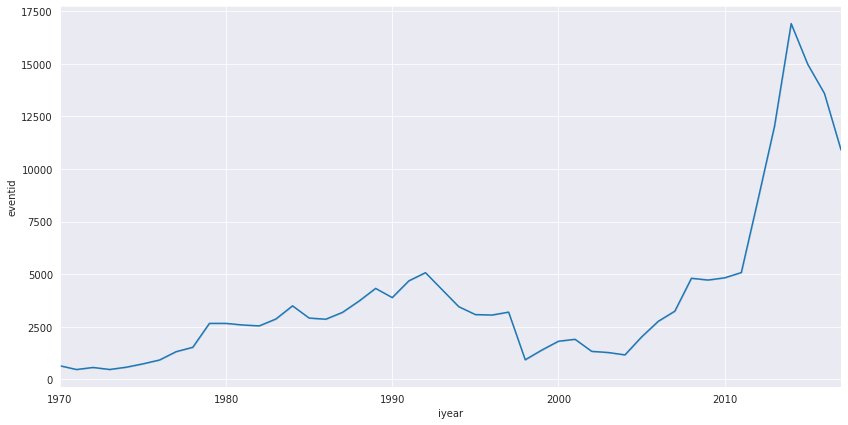

In [110]:
fig, ax = plt.subplots(figsize = (14,7))
sns.lineplot(x='iyear', y='eventid',data= gta_df,estimator= np.count_nonzero, palette= 'bright')
plt.xlim(1970,2017)

Global Terrorism started increasing to an all time high from 2011. This peaked in the year 2014 and started dipping ever since

##Comparing Global Trends of terrorist attack per year with Regional Trends of terrorist attack per year

(1970.0, 2017.0)

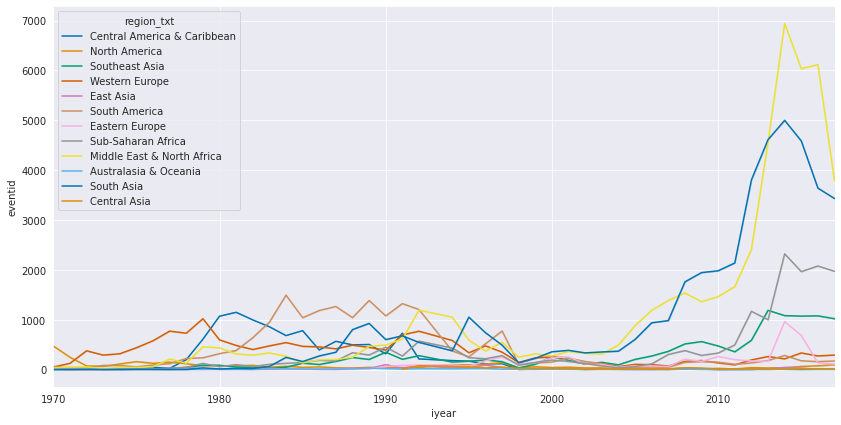

In [112]:
fig, ax = plt.subplots(figsize = (14,7))
sns.lineplot(x='iyear', y='eventid',data= gta_df,hue = 'region_txt',estimator= np.count_nonzero, palette= 'colorblind')
plt.xlim(1970,2017)

By comparing the spikes and dips of Middle East & North Africa and Southeast Asia with the Global trends from late 90's, we can reasonably speculate that the three regions plays a vital role in affecting global terrorism

**Close Comparison**

Blue Line indicates the Global Trend. The sum of distance under the curves of South Asia and Middle East & North Africa is more than 50% of the distance under the curve of Global. Using this observation we can tell that regions South Asia and Middle East & North Africa play an impactful role in Global Terrorism 


Text(0.5, 0, 'Trends')

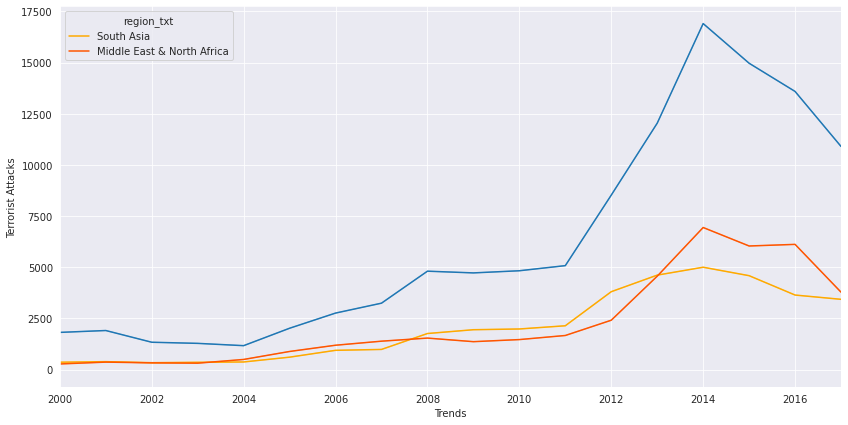

In [136]:
regions = ['South Asia','Middle East & North Africa']
fig, ax = plt.subplots(figsize = (14,7))
sns.lineplot(x='iyear', y='eventid',data= gta_df , estimator= np.count_nonzero)
sns.lineplot(x='iyear', y='eventid',data= gta_df,hue= 'region_txt',hue_order= regions,estimator= np.count_nonzero, palette='autumn_r')
plt.xlim(2000,2017)
plt.ylabel("Terrorist Attacks")
plt.xlabel("Trends")

##Fatalities of Terrorist Attacks in different Regions of the World from 1970 to 2017

(1970.0, 2017.0)

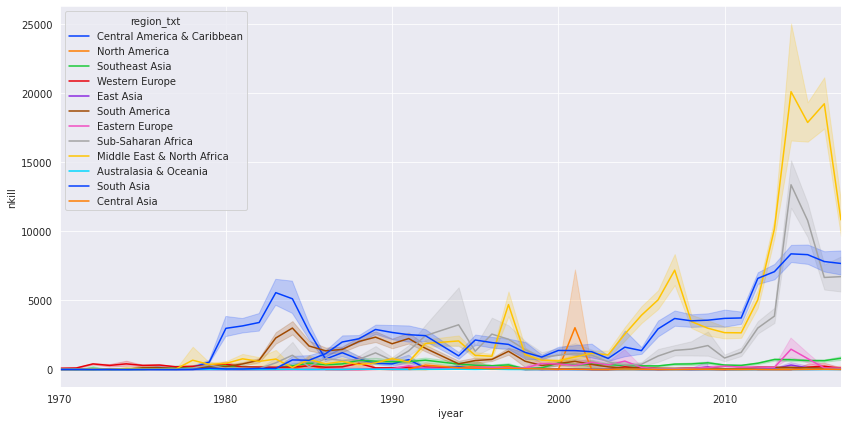

In [141]:
fig, ax = plt.subplots(figsize = (14,7))
sns.lineplot(x='iyear', y='nkill',data= gta_df, hue='region_txt',estimator= np.sum, palette= 'bright')
plt.xlim(1970,2017)

**Making sense of the data above**

Blue line spike near the 2000 indicates september 11 attacks in USA

Yellow line spike between mid 2000's and 2010 the war tensions refers to the battle of gaza bw Hamas and Fatah. 2009 the gaza war ended explaining the dip

The Yellow line peaks again in 2010  with Syrian Civil War(2011) and Iraqui Civil War(2013-2017)

The decades from 1980 to 2000 sees 

##Total Number of Attacks for each Type of Attack 

Text(0, 0.5, 'Attack Type')

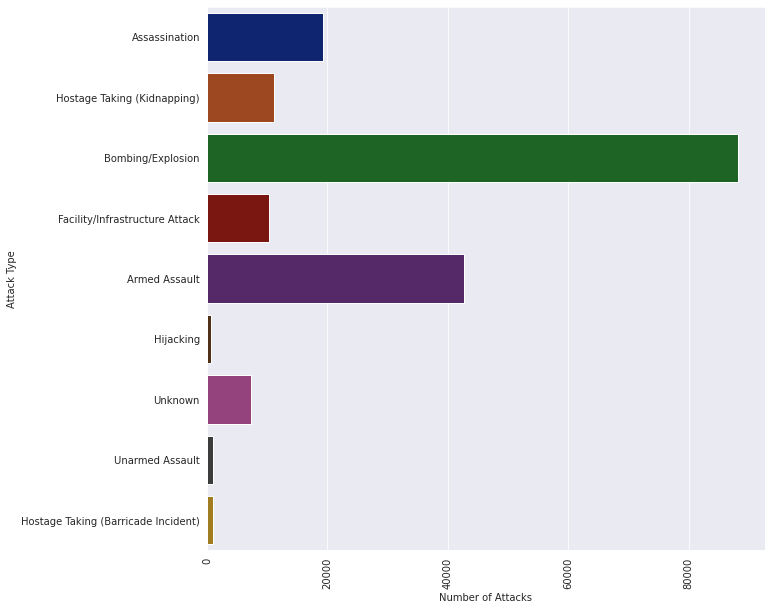

In [64]:
sns.countplot(y ='attacktype1_txt',data = gta_df, palette ='dark')
plt.xticks(rotation=90)
plt.xlabel('Number of Attacks')
plt.ylabel('Attack Type')


The top 3 most comonly perpetrated types of attack are

1. Bombing/Explosion (around two times more frequent than Armed Assault)
2. Armed Assault (around two times more frequent than Assassinations)
3. Assassination

The frequency of the top 3 attacks increase by twofolds as we move up the ladder  

##Visualizing the extent of the Top 3 commonly perpetrated attacks in different regions of the country

In [186]:
col= ['Bombing/Explosion', 'Armed Assault', 'Assassination']

Text(0.5, 0, 'Attack Type')

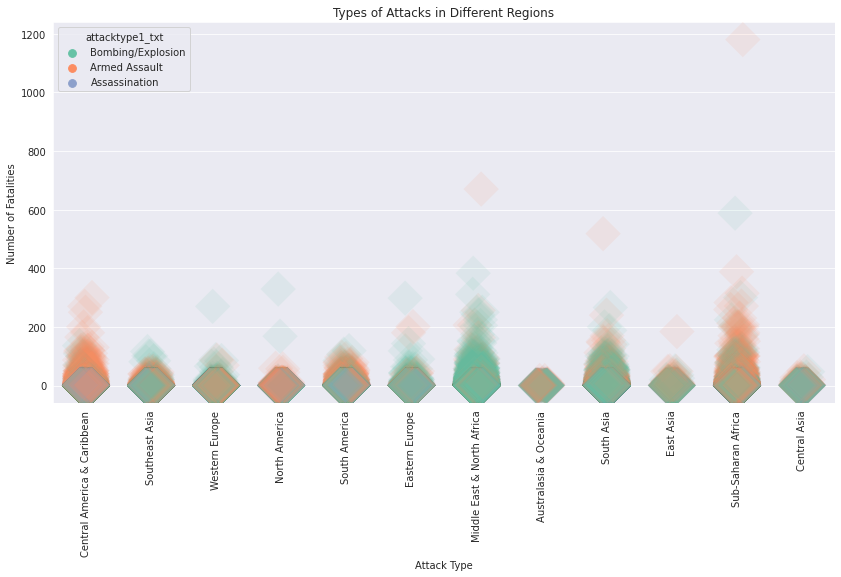

In [205]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize = (14,7))
# plot the graph using the default estimator mean
sns.stripplot(x ='region_txt', y ='nkill', data = df,hue='attacktype1_txt', hue_order= col,
              palette="Set2", 
              size=25, 
              marker="D",
              edgecolor="gray", alpha=.10)

plt.xticks(rotation=90)
plt.title("Types of Attacks in Different Regions")
plt.ylabel('Number of Fatalities')
plt.xlabel('Attack Type')

Armed Assault is a major concern mainly in regions like
 1. Central America & Caribbean
 2. Sub-Saharan Africa
 and
 3. North America

Bombings

##Barplot of Type of Attacks and the Total Fatalities

## Armed Assault Analysis


In [145]:
armass = gta_df[gta_df.attacktype1_txt =='Armed Assault']

### Armed Assaults Fatalities in different Regions

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

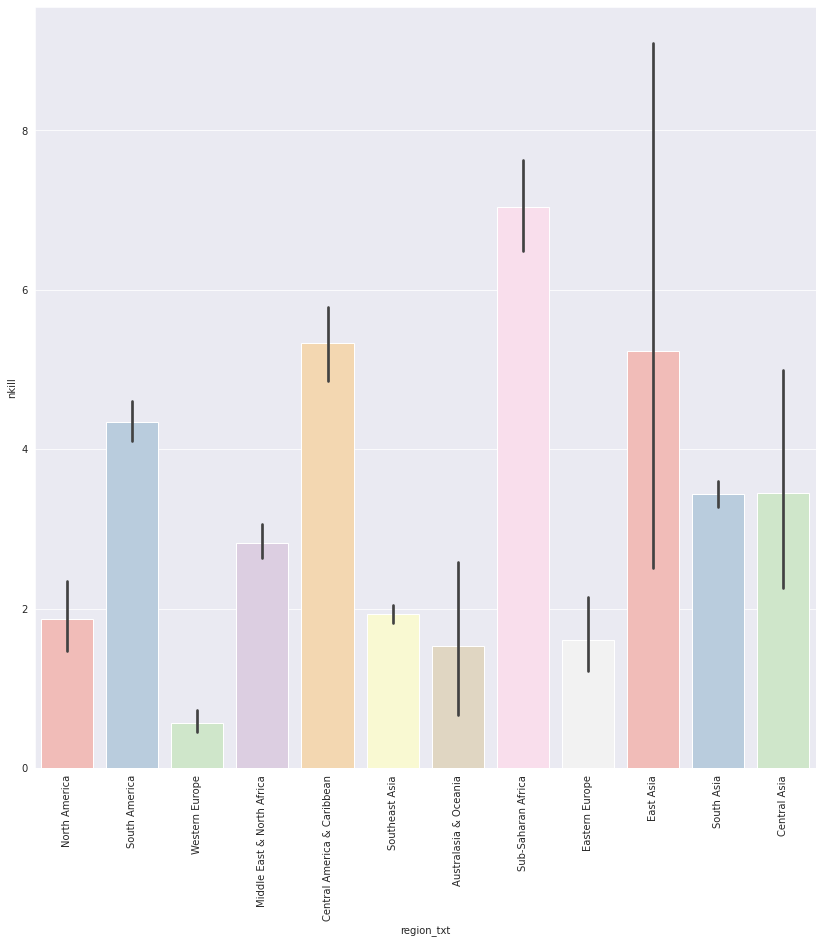

In [146]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize = (14,14))
sns.barplot(x ='region_txt', y ='nkill',data = armass, palette ='Pastel1')
plt.xticks(rotation=90)

Weapon Type

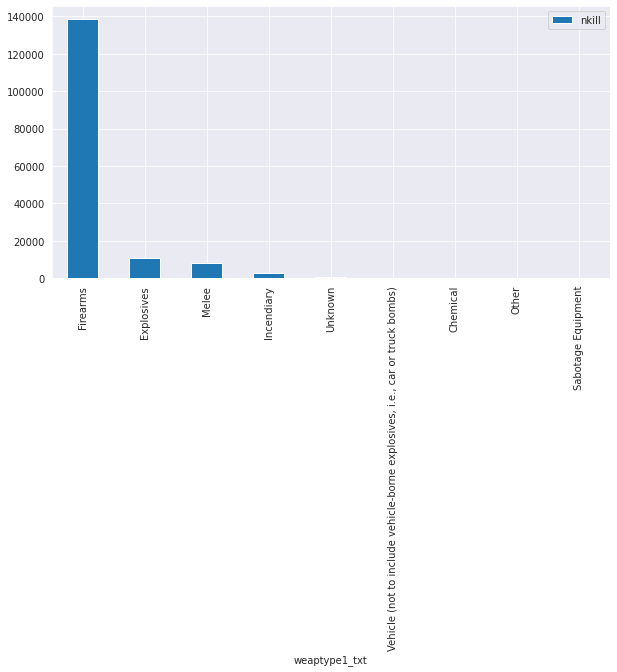

In [147]:
plt.rcParams['figure.figsize'] = (10,5)
armass.groupby(['weaptype1_txt']).agg({'nkill':'sum'}).sort_values(['nkill'], ascending = False).plot(kind = 'bar')

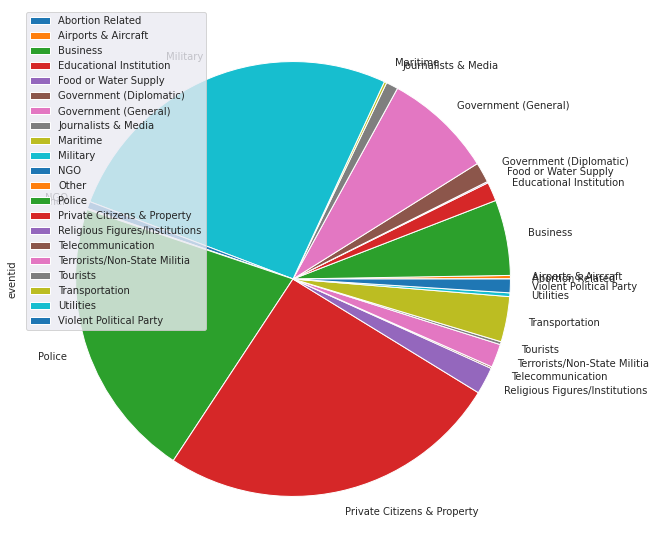

In [148]:
plt.rcParams['figure.figsize'] = (15, 10)
armas = gta_df[gta_df.attacktype1_txt =='Armed Assault'].copy()
armas.groupby(['targtype1_txt']).agg({'eventid':'count'}).drop('Unknown',axis=0).plot(x='targtype_txt', y='eventid' ,kind = 'pie')

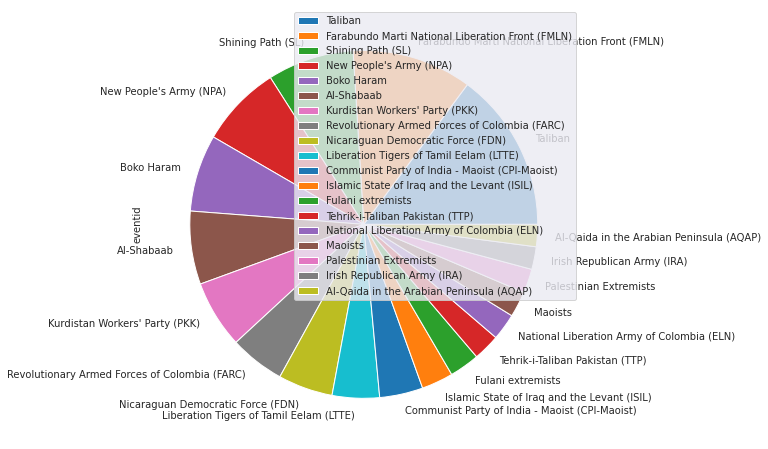

In [149]:
plt.rcParams['figure.figsize'] = (25, 8)
armas = gta_df[(gta_df.attacktype1_txt =='Armed Assault') & (~gta_df.gname.isna()) ].copy()
gangs = armas.groupby(['gname']).agg({'eventid': 'count'})
gangs.sort_values(['eventid'], ascending= False).head(20).iloc[1:,:].plot(x='gname', y='eventid',kind = 'pie')

## Bombing/Explosion

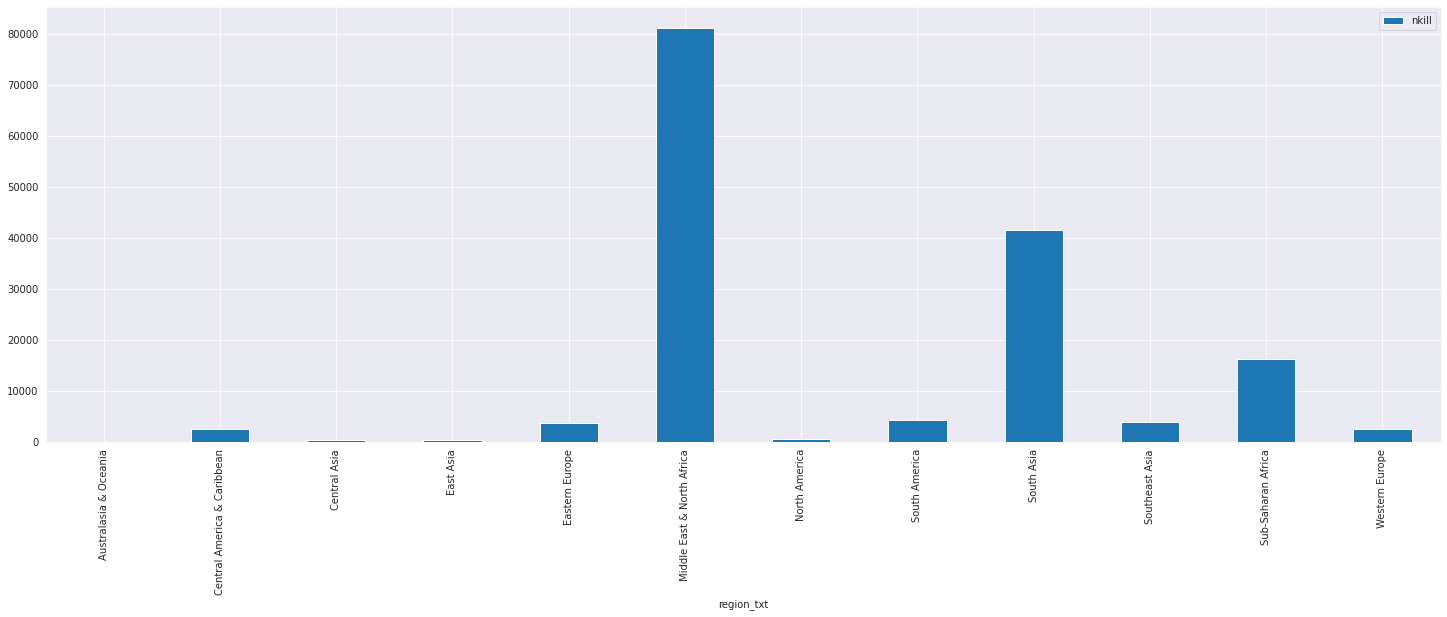

In [150]:
gta_df[gta_df.attacktype1_txt =='Bombing/Explosion'].groupby(['region_txt']).agg({'nkill':'sum'}).plot(kind='bar')

In [151]:
bomb = gta_df[gta_df.attacktype1_txt =='Bombing/Explosion'].copy()
bomb

,eventid,iyear,country_txt,region_txt,city,crit1,crit2,crit3,attacktype1,attacktype1_txt,success,suicide,weaptype1,weaptype1_txt,targtype1,targtype1_txt,gname,claimed,nkill
3,197001000002,1970,Greece,Western Europe,Athens,1,1,1,3,Bombing/Explosion,1,0,6,Explosives,7,Government (Diplomatic),Unknown,-9.0,0.0
7,197001020002,1970,United States,North America,Oakland,1,1,1,3,Bombing/Explosion,1,0,6,Explosives,21,Utilities,Unknown,0.0,0.0
10,197001050001,1970,United States,North America,Baraboo,1,1,0,3,Bombing/Explosion,0,0,6,Explosives,4,Military,"Weather Underground, Weathermen",-9.0,0.0
15,197001100001,1970,East Germany (GDR),Eastern Europe,Berlin,1,1,1,3,Bombing/Explosion,1,0,6,Explosives,2,Government (General),Commune 1,-9.0,0.0
17,197001120001,1970,United States,North America,New York City,1,1,1,3,Bombing/Explosion,1,0,6,Explosives,8,Educational Institution,Black Nationalists,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181681,201712310016,2017,Philippines,Southeast Asia,Shariff Aguak,1,1,1,3,Bombing/Explosion,1,0,6,Explosives,3,Police,Bangsamoro Islamic Freedom Movement (BIFM),0.0,1.0
181685,201712310020,2017,Afghanistan,South Asia,Maymana,1,1,1,3,Bombing/Explosion,1,0,6,Explosives,1,Business,Unknown,0.0,0.0
181687,201712310029,2017,Syria,Middle East & North Africa,Jableh,1,1,0,3,Bombing/Explosion,1,0,6,Explosives,4,Military,Muslim extremists,0.0,2.0
181689,201712310031,2017,India,South Asia,Imphal,1,1,1,3,Bombing/Explosion,0,0,6,Explosives,2,Government (General),Unknown,0.0,0.0


Common Targets of Explosion

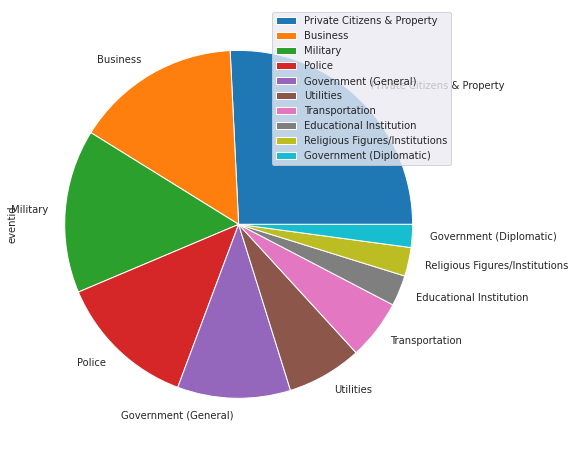

In [152]:
bomb.groupby(['targtype1_txt']).agg({'eventid': 'count'}).sort_values('eventid', ascending =False).drop('Unknown', axis = 0).head(10).plot(x = 'targtype1_txt', y='eventid',kind= 'pie')

Amount of Explosions per region
 

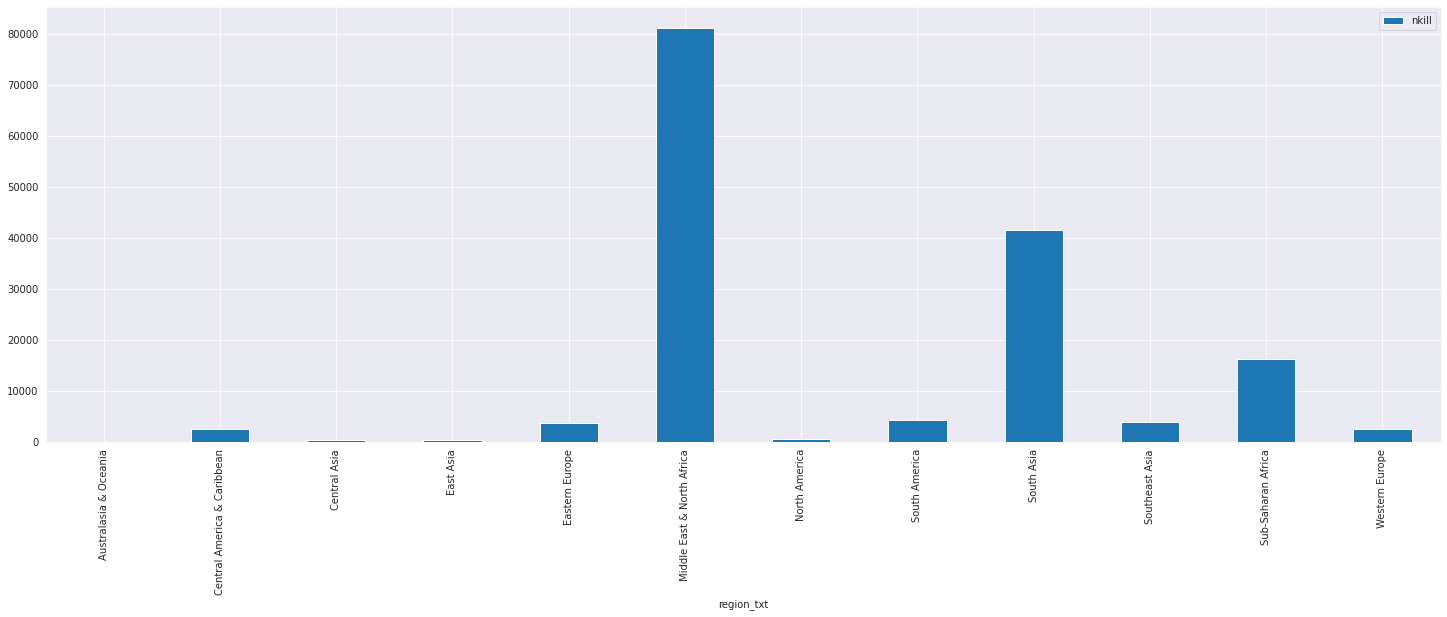

In [153]:
bomb.groupby(['region_txt']).agg({'nkill':'sum'}).plot(kind='bar')

Top 3 explosion/bombing prone region are 
1)Middle East and North Africa 
2)South Asia
3)Sub-Saharan Africa

#### Middle East & North Africa

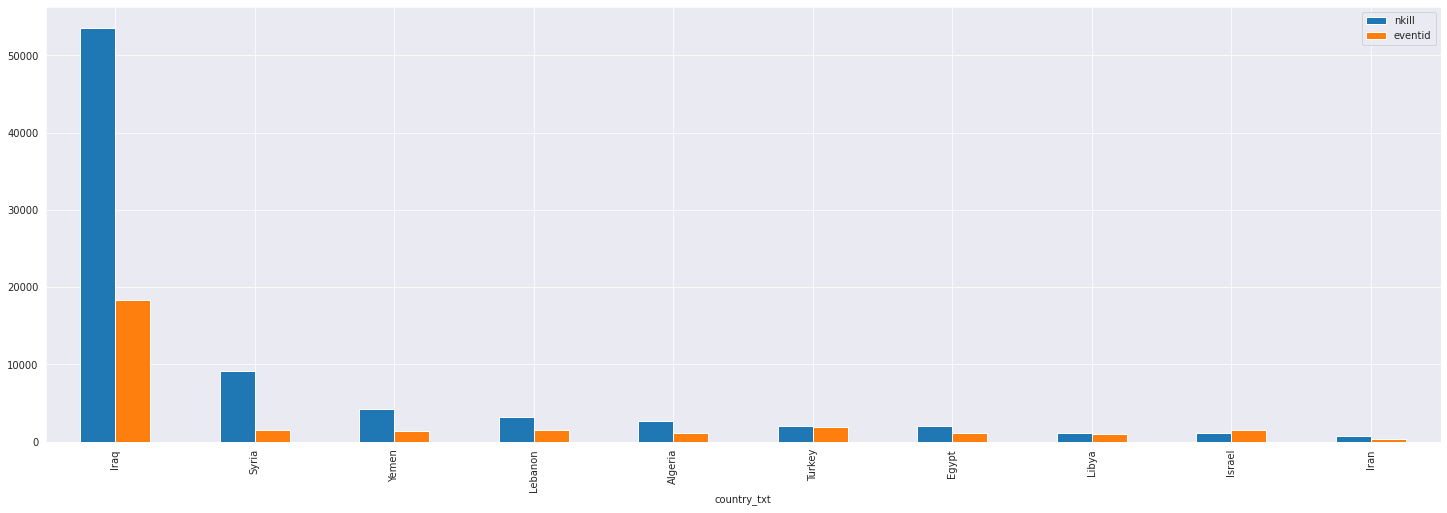

In [154]:
midea = bomb[bomb['region_txt']=='Middle East & North Africa'].copy()
midea.groupby(['country_txt']).agg({'nkill': 'sum', 'eventid':'count'}).sort_values(['nkill', 'eventid'],ascending = False).head(10).plot(kind='bar')


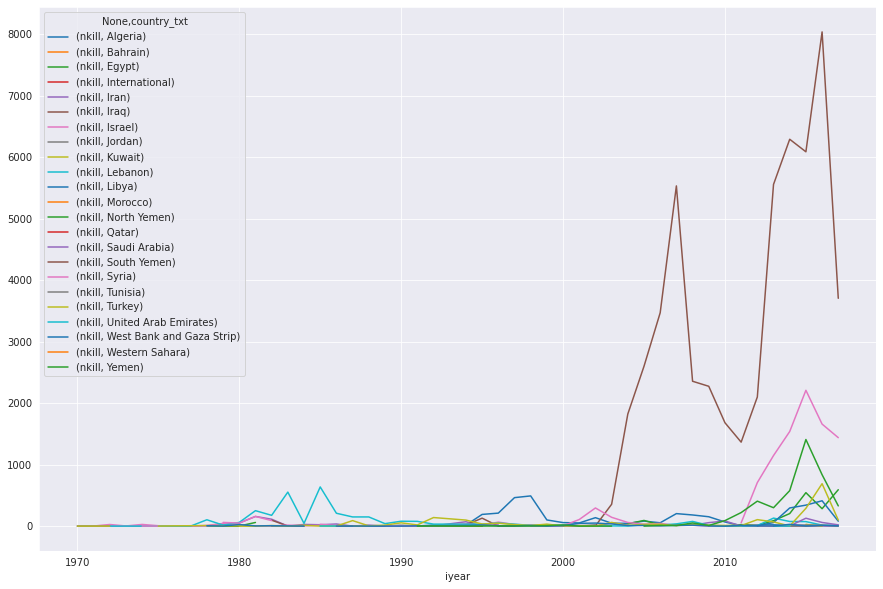

In [155]:
plt.rcParams['figure.figsize'] = (15, 10)
midea.groupby([ 'iyear', 'country_txt',]).agg({'nkill': 'sum'}).unstack().plot()

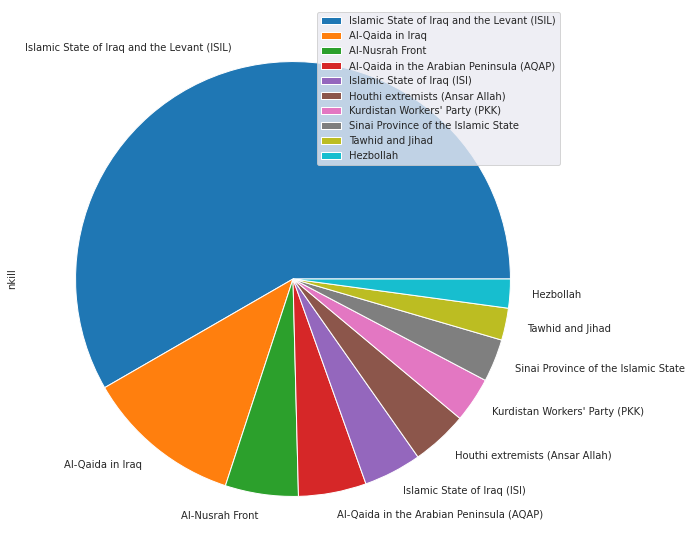

In [156]:
midea.groupby(['gname']).agg({'nkill':'sum'}).sort_values(['nkill'], ascending = False).drop('Unknown', axis = 0).head(10).plot(x='gname' , y='nkill' ,kind='pie')

####South Asia

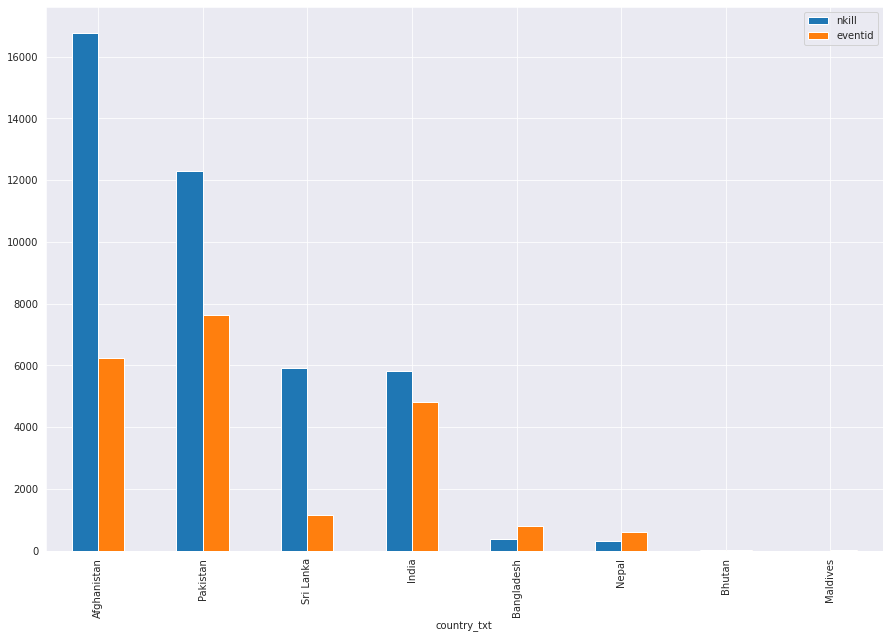

In [157]:
southasia = bomb[bomb['region_txt']=='South Asia'].copy()
southasia.groupby(['country_txt']).agg({'nkill': 'sum', 'eventid':'count'}).sort_values(['nkill', 'eventid'],ascending = False).head(10).plot(kind='bar')

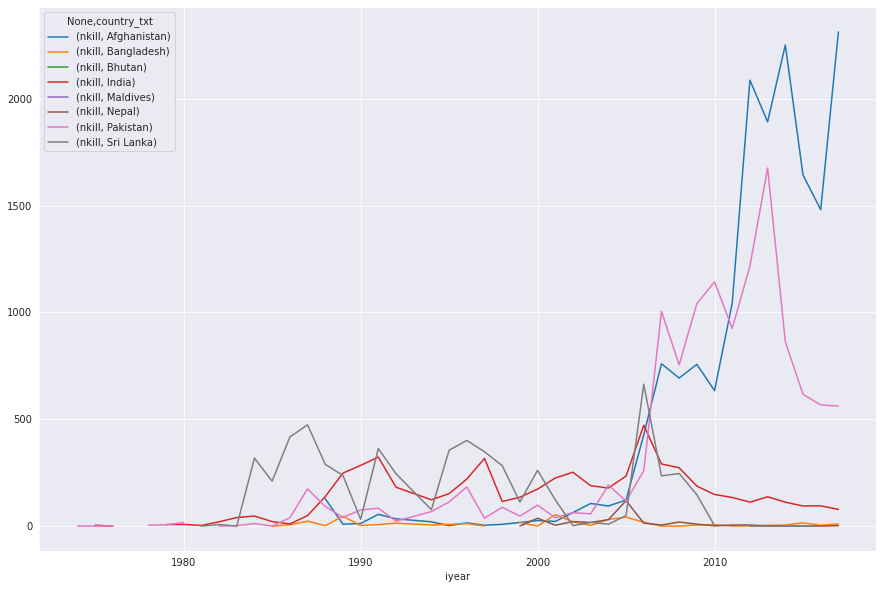

In [158]:
plt.rcParams['figure.figsize'] = (15, 10)
southasia.groupby([ 'iyear', 'country_txt',]).agg({'nkill': 'sum'}).unstack().plot()

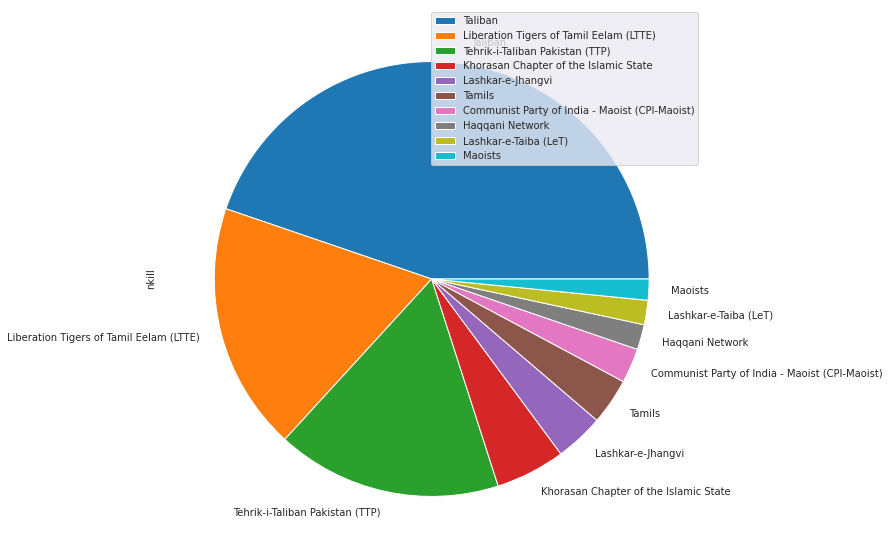

In [159]:
southasia.groupby(['gname']).agg({'nkill':'sum'}).sort_values(['nkill'], ascending = False).drop('Unknown', axis = 0).head(10).plot(x='gname' , y='nkill' ,kind='pie')

####Sub-Saharan Africa

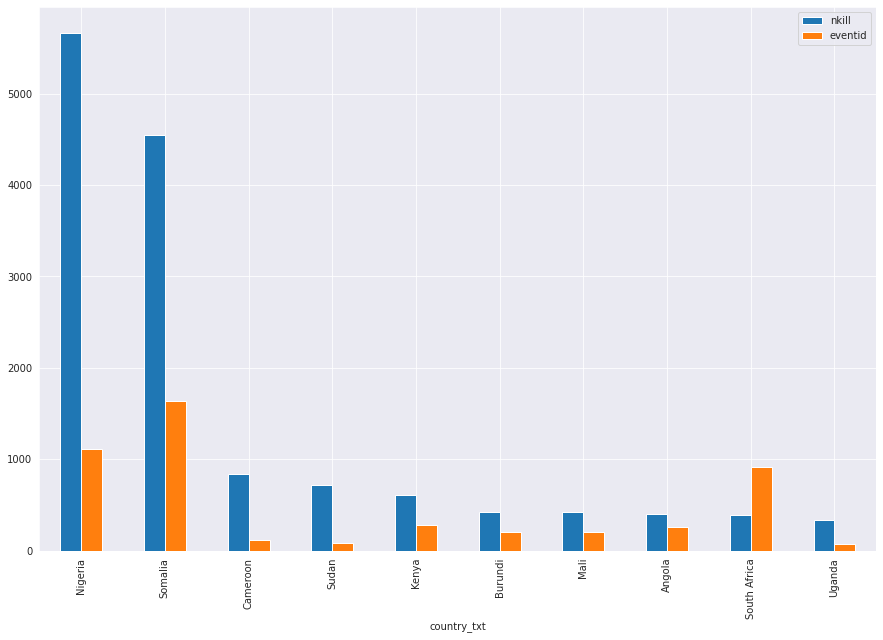

In [160]:
subsah = bomb[bomb['region_txt']=='Sub-Saharan Africa'].copy()
subsah.groupby(['country_txt']).agg({'nkill': 'sum', 'eventid':'count'}).sort_values(['nkill', 'eventid'],ascending = False).head(10).plot(kind='bar')

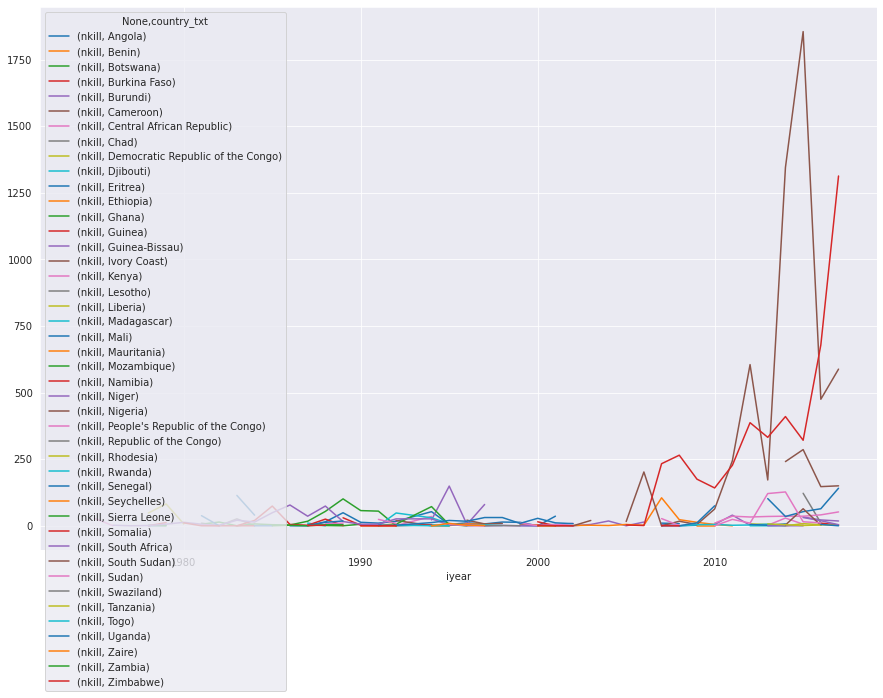

In [161]:
plt.rcParams['figure.figsize'] = (15, 10)
subsah.groupby([ 'iyear', 'country_txt',]).agg({'nkill': 'sum'}).unstack().plot()

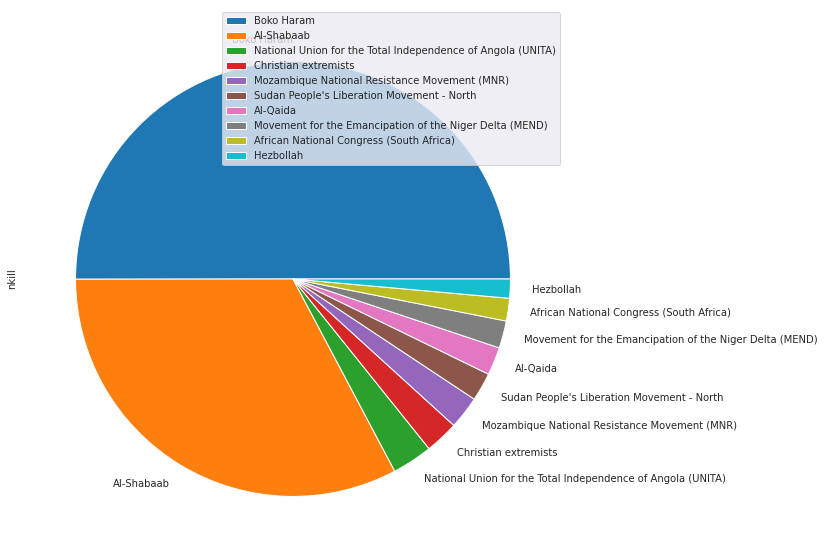

In [162]:
subsah.groupby(['gname']).agg({'nkill':'sum'}).sort_values(['nkill'], ascending = False).drop('Unknown', axis = 0).head(10).plot(x='gname' , y='nkill' ,kind='pie')

##Assassination

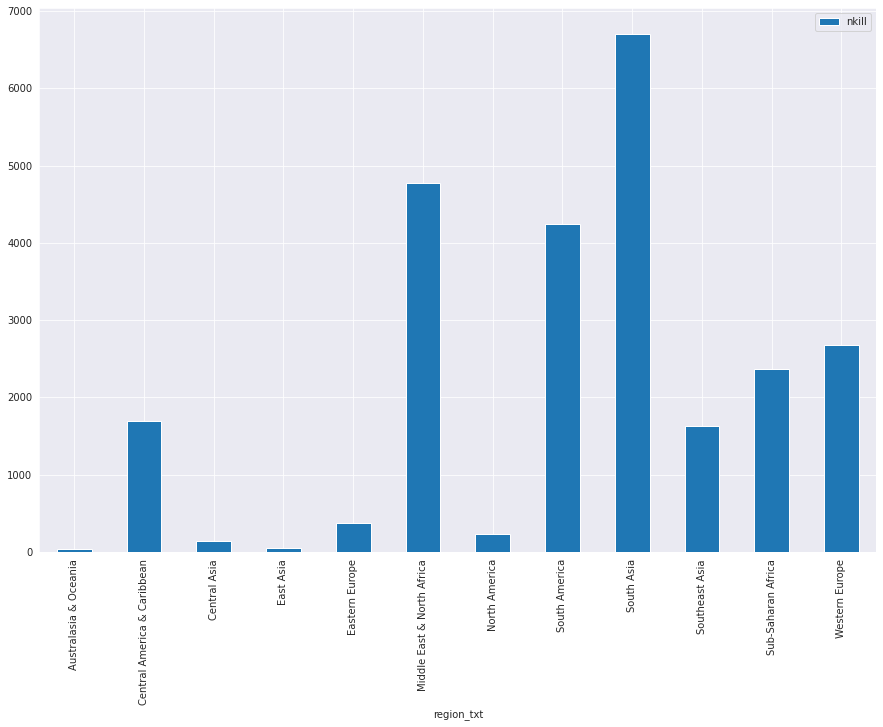

In [163]:
assas = gta_df[gta_df.attacktype1_txt =='Assassination']
assas.groupby(['region_txt']).agg({'nkill':'sum'}).plot(kind='bar')

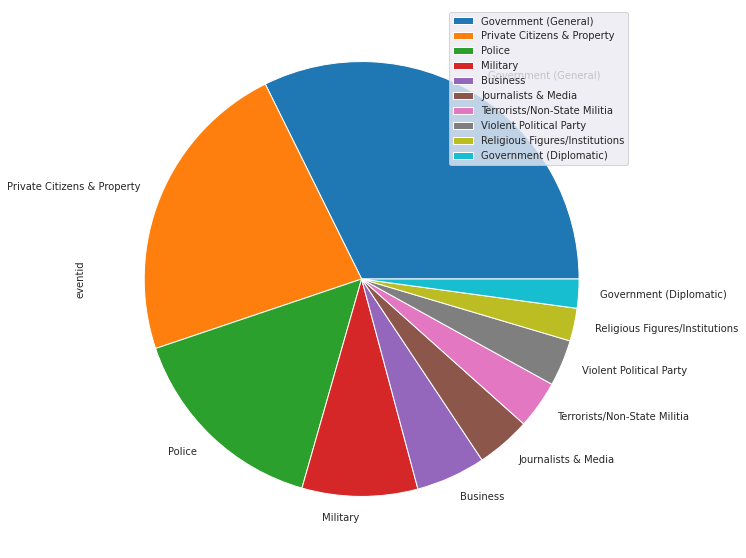

In [164]:
assas.groupby(['targtype1_txt']).agg({'eventid': 'count'}).sort_values('eventid', ascending =False).drop('Unknown', axis = 0).head(10).plot(x = 'targtype1_txt', y='eventid',kind= 'pie')

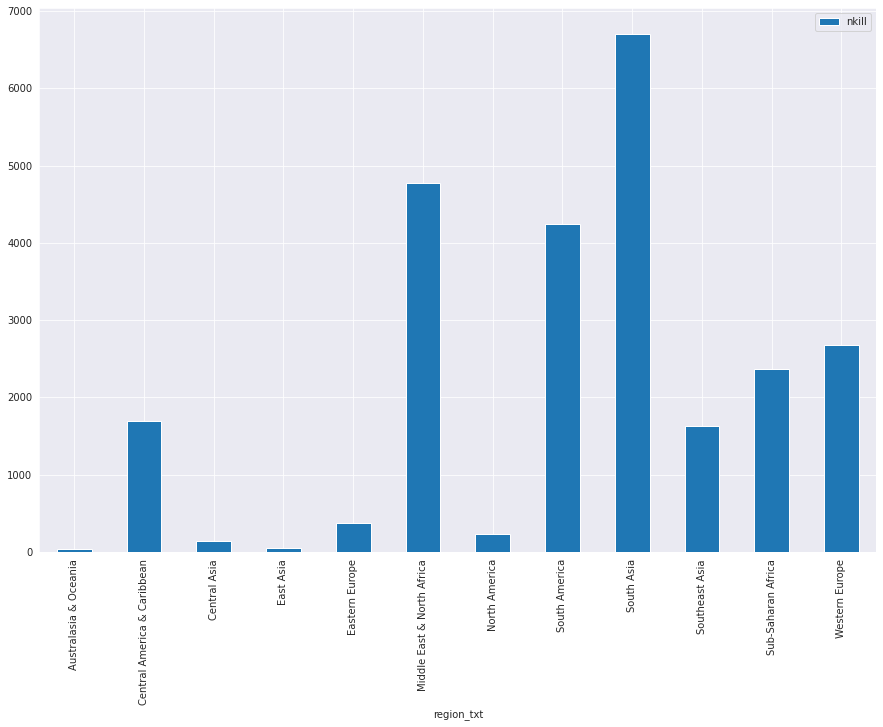

In [165]:
assas.groupby(['region_txt']).agg({'nkill':'sum'}).plot(kind='bar')

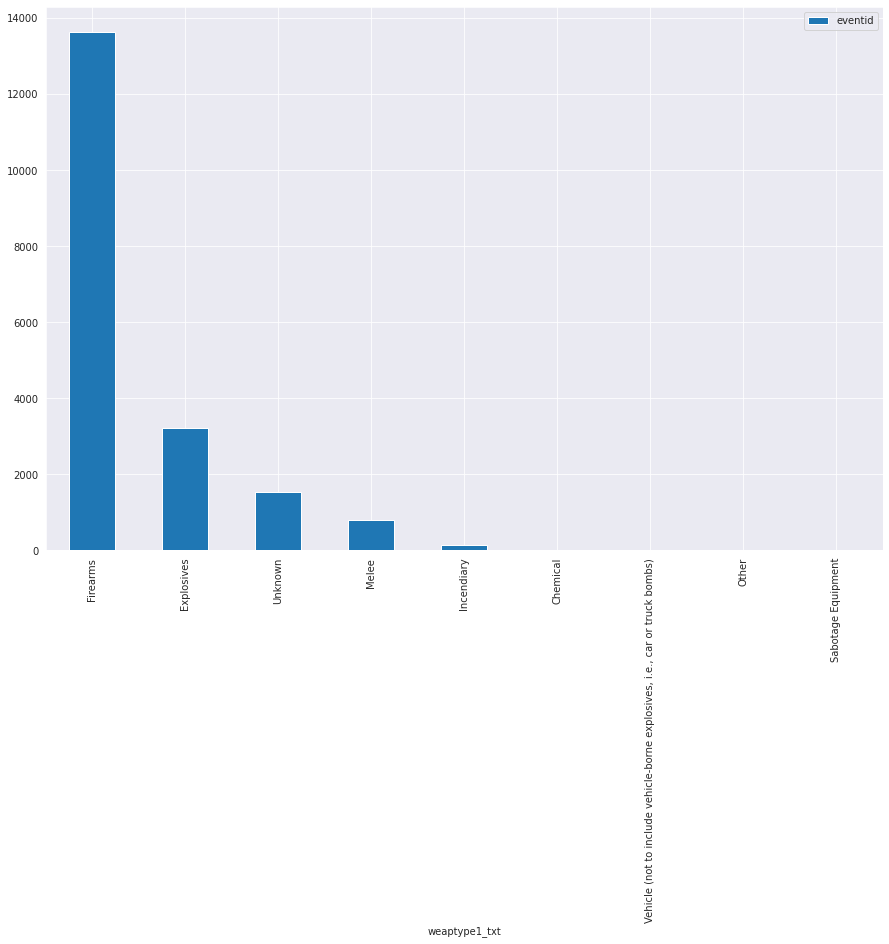

In [166]:
assas.groupby(['weaptype1_txt']).agg({'eventid':'count'}).sort_values(['eventid'], ascending = False).plot(kind = 'bar')

#Analysis by Region through Time

## Comparing Countries

India and Pakistan

In [167]:
gta_df[(gta_df)]

ValueError: ignored

Israel and Palenstine